<a href="https://colab.research.google.com/github/Ayikoandrew/Andrej-ml-class/blob/main/coursework_fine_tuning_mlp_on_fashion_mnist_to_cifar_10_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import keras
from keras import layers, Sequential, ops
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [47]:
def mlp(input_dim=28*28, hidden_dims=(256, 128)):
  model = Sequential([
    layers.Input((input_dim,)),
    layers.Dense(hidden_dims[0], activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    layers.Dense(hidden_dims[1], activation='relu'),
    layers.Dense(10, activation='softmax')
])
  return model

def fashion_dataset():
  (x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
  x_train = x_train.astype('float32') / 250.0
  x_test = x_test.astype('float32') / 250.0

  x_train = x_train.reshape((-1, 28*28))
  x_test = x_test.reshape((-1, 28*28))

  return (x_train, y_train), (x_test, y_test)

In [48]:
(x_train, y_train), (x_test, y_test) = fashion_dataset()
model = mlp()

In [49]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

history = model.fit(x_train, y_train, validation_data=(x_test, y_test),epochs=10, batch_size=128)

model.save_weights('/tmp/.weights.h5')

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.9677 - sparse_categorical_accuracy: 0.7621 - val_loss: 0.5833 - val_sparse_categorical_accuracy: 0.8471
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.5408 - sparse_categorical_accuracy: 0.8546 - val_loss: 0.4932 - val_sparse_categorical_accuracy: 0.8572
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.4627 - sparse_categorical_accuracy: 0.8669 - val_loss: 0.4611 - val_sparse_categorical_accuracy: 0.8629
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.4206 - sparse_categorical_accuracy: 0.8754 - val_loss: 0.4591 - val_sparse_categorical_accuracy: 0.8623
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.4077 - sparse_categorical_accuracy: 0.8746 - val_loss: 0.4428 - val_sparse_categorical_accuracy: 0.8632
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.3927 - sparse_categorical_accuracy: 0.8810 - val_loss: 0.4339 - val_sparse_categorical_accuracy: 0.8676
E

In [36]:
W, b = model.layers[1].get_weights()

In [ ]:
print(f"Weights: {W}")
print(f"Bias: {b}")

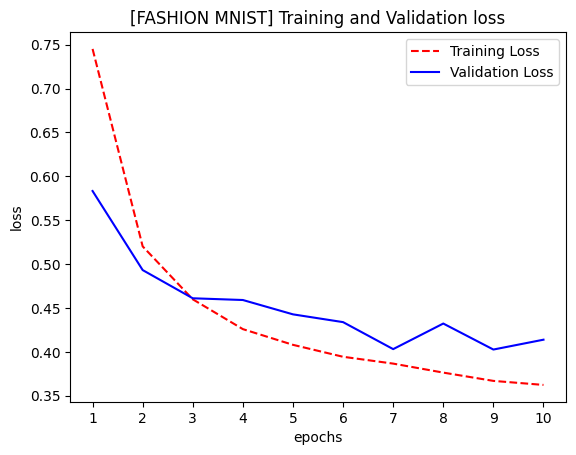

In [50]:
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'r--', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title("[FASHION MNIST] Training and Validation loss")
plt.xlabel("epochs")
plt.xticks(epochs)
plt.ylabel("loss")
plt.legend()
plt.show()

In [45]:
history.history.keys()

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])

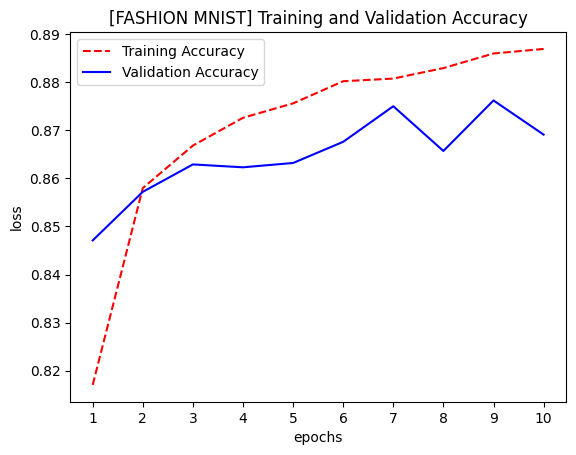

In [51]:
history_dict = history.history
loss = history_dict['sparse_categorical_accuracy']
val_loss = history_dict['val_sparse_categorical_accuracy']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'r--', label='Training Accuracy')
plt.plot(epochs, val_loss, 'b', label='Validation Accuracy')
plt.title("[FASHION MNIST] Training and Validation Accuracy")
plt.xlabel("epochs")
plt.xticks(epochs)
plt.ylabel("loss")
plt.legend()
plt.show()

In [60]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [61]:
x_train = x_train.astype('float32') / 255.0
# y_train = y_train.astype('float32') / 255.0
print(f"x_train shape: {x_train.shape}")

x_train_gray = tf.image.rgb_to_grayscale(x_train).numpy()

x_train shape: (50000, 32, 32, 3)


In [62]:
x_train_resize = tf.image.resize(x_train_gray, [28, 28]).numpy()

In [63]:
x_train_resize.shape

(50000, 28, 28, 1)

In [64]:
x_train_resize = x_train_resize.reshape((-1, 28*28))

In [65]:
x_train_resize.shape

(50000, 784)

In [68]:
x_train = x_train_resize.reshape(-1)

In [69]:
x_train.shape

(39200000,)

In [70]:
def cifar_dataset():
  (x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

  x_train = x_train.astype('float32') / 255.0
  x_test = x_test.astype('float32') / 255.0

  x_train_gray = tf.image.rgb_to_grayscale(x_train).numpy()
  x_test_gray = tf.image.rgb_to_grayscale(x_test).numpy()

  x_train_resized = tf.image.resize(x_train_gray, [28, 28]).numpy()
  x_test_resized = tf.image.resize(x_test_gray, [28, 28]).numpy()

  x_train_resized = x_train_resized.reshape((-1, 28*28))
  x_test_resized = x_test_resized.reshape((-1, 28*28))

  y_train = y_train.reshape(-1)
  y_test = y_test.reshape(-1)

  return (x_train_resized, y_train), (x_test_resized, y_test)

In [71]:
(x_train, y_train), (x_test, y_test) = cifar_dataset()

In [77]:
ft_model = mlp()

In [78]:
ft_model.layers[1].get_weights()

[array([[-0.01553094,  0.08579782, -0.10018811, ..., -0.04775444,
         -0.06136513, -0.02096325],
        [ 0.10799709,  0.01856402,  0.08313888, ..., -0.01275563,
         -0.12055621, -0.1188637 ],
        [-0.06298846,  0.03330067, -0.04578069, ...,  0.07708713,
         -0.0568769 , -0.08613324],
        ...,
        [-0.05409303,  0.09788388,  0.02749988, ..., -0.05913505,
         -0.01121008, -0.09001422],
        [ 0.10342175,  0.12043875, -0.1022976 , ...,  0.01948822,
         -0.07464629, -0.07012445],
        [-0.04622334, -0.04293829, -0.04291427, ..., -0.0105001 ,
         -0.05226934, -0.09332174]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [79]:
ft_model.load_weights('/tmp/.weights.h5')

In [80]:
ft_model.layers[1].get_weights()

[array([[ 0.03434411, -0.03443861,  0.08959075, ..., -0.02217357,
          0.07673009, -0.11796346],
        [ 0.02318855,  0.10834935,  0.14606544, ..., -0.11487565,
         -0.06376428, -0.13029431],
        [ 0.05389494,  0.18546183, -0.07900546, ..., -0.06508492,
         -0.06195594, -0.08181596],
        ...,
        [ 0.08780394,  0.04196875, -0.04218616, ..., -0.10276429,
         -0.16356161, -0.02238669],
        [-0.05525121, -0.1537146 ,  0.31245917, ..., -0.03907457,
          0.03914418,  0.05538815],
        [ 0.04703741, -0.06383467, -0.07385908, ...,  0.01109628,
          0.05836408, -0.1605195 ]], dtype=float32),
 array([ 0.11409788,  0.16523975,  0.2646797 ,  0.15621093,  0.03972175,
         0.04019986,  0.06004995,  0.13056207,  0.121665  ,  0.07278367,
         0.17211519, -0.01530105, -0.02291001,  0.2140576 ,  0.06714506,
         0.17712021, -0.00613714,  0.22904041,  0.03844443, -0.00042906,
        -0.03920065,  0.07195386, -0.02161425,  0.1332667 , -0.033

In [81]:
ft_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[keras.metrics.SparseCategoricalAccuracy()]
)

In [82]:
history = ft_model.fit(
    x_train,
    y_train,
    epochs=8,
    batch_size=128,
    validation_data=(x_test, y_test)
)

Epoch 1/8
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 4.2621 - sparse_categorical_accuracy: 0.1539 - val_loss: 2.1850 - val_sparse_categorical_accuracy: 0.2208
Epoch 2/8
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 2.1495 - sparse_categorical_accuracy: 0.2403 - val_loss: 2.0854 - val_sparse_categorical_accuracy: 0.2656
Epoch 3/8
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 2.0566 - sparse_categorical_accuracy: 0.2702 - val_loss: 2.0144 - val_sparse_categorical_accuracy: 0.2838
Epoch 4/8
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 2.0523 - sparse_categorical_accuracy: 0.2682 - val_loss: 2.1597 - val_sparse_categorical_accuracy: 0.2335
Epoch 5/8
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 2.0440 - sparse_categorical_accuracy: 0.2779 - val_loss: 2.0091 - val_sparse_categorical_accuracy: 0.2770
Epoch 6/8
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 2.0045 - sparse_categorical_accuracy: 0.2853 - val_loss: 1.9876 - val_sparse_categorical_accuracy: 0.2983
Epoc

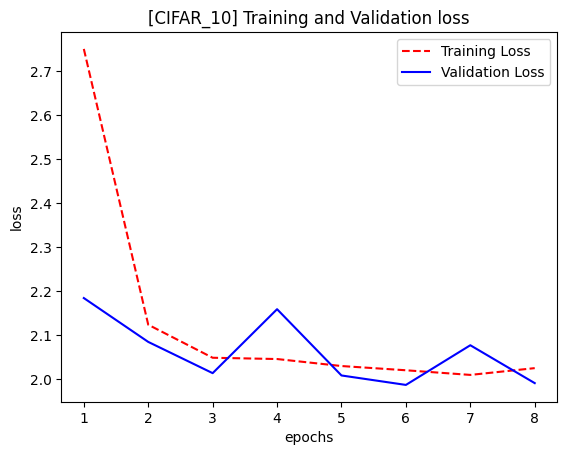

In [85]:
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'r--', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title("[CIFAR_10] Training and Validation loss")
plt.xlabel("epochs")
plt.xticks(epochs)
plt.ylabel("loss")
plt.legend()
plt.show()

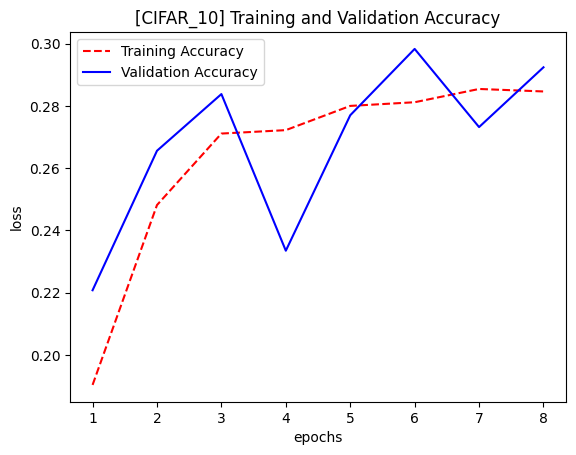

In [86]:
history_dict = history.history
loss = history_dict['sparse_categorical_accuracy']
val_loss = history_dict['val_sparse_categorical_accuracy']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'r--', label='Training Accuracy')
plt.plot(epochs, val_loss, 'b', label='Validation Accuracy')
plt.title("[CIFAR_10] Training and Validation Accuracy")
plt.xlabel("epochs")
plt.xticks(epochs)
plt.ylabel("loss")
plt.legend()
plt.show()